In [22]:
import json
import os
import textwrap
from urllib.parse import urlparse

from PIL import Image
from IPython.display import display

# Memory

In [25]:
with open('./agent_history/memory/SHOPPING.json', 'r') as file:
    website_dict = json.load(file)

website_dict['url']

'http://35.203.86.70:7770/'

In [26]:
def convert_img_path(img_path):
    local_path = img_path.replace('/home/jayoo/code/pytorch_docker/Web_Nav/webstudent/webstudent/memory/saved_files', './agent_history/memory')
    return local_path

def convert_url(url):
    url_map = {
        'http://35.203.86.70:9980/': 'CLASSIFIEDS', 
        'http://35.203.86.70:7770/': 'SHOPPING', 
        'http://35.203.86.70:9999':'REDDIT', 
        'http://35.203.86.70:8888/':'WIKIPEDIA', 
        'localhost:7780/admin/':'SHOPPING_ADMIN', 
        'localhost:8023/':'GITLAB', 
        'localhost:3000/':'MAP'
    }
    parsed_url = urlparse(url)
    local_hostname = parsed_url.netloc
    env_name = local_hostname
    for local_url in url_map.keys():
        if local_hostname in local_url:
            env_name = url_map[local_url]
    path = parsed_url.path
    return env_name + path

In [30]:
page_index = 0
pages_dict = website_dict["pages"]

Run the cell below to show the next agent step.

Page: 2
URL = SHOPPING/beauty-personal-care.html
Name: Beauty & Personal Care



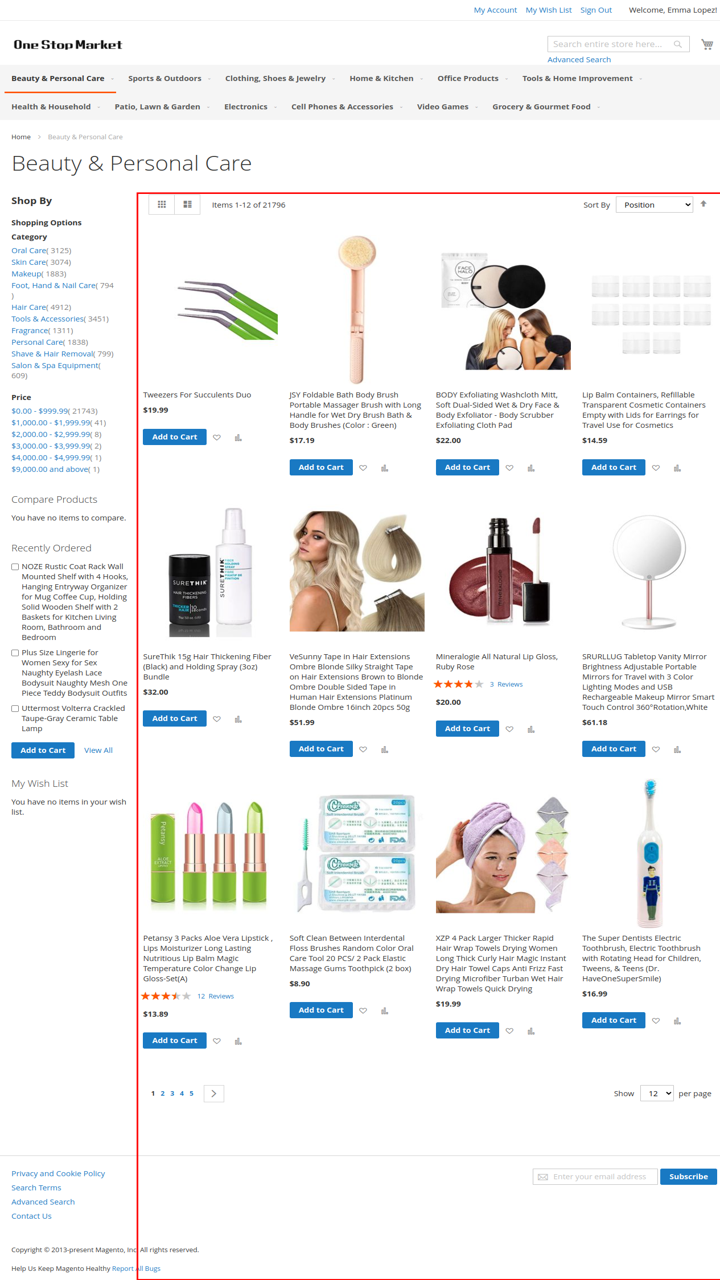

Full:
The screenshot shows a webpage with a list of shopping options for a car care
product. The categories listed are Oral Care, Hair Care, and Price, each with
subcategories and prices. There is also a section for 'Compare Products' and
'Recently Ordered' items, with checkboxes for different products. The products
include various treatments for hair and teeth, such as toothpaste, mouthwash,
and shampoos. The prices range from $0.00 to $9,999.99.

Summary:
This section contains a list of shopping options for car care products,
categorized by Oral Care, Hair Care, and Price, with subcategories and prices,
as well as features for comparing and tracking products.  **All Categories:**  *
Hair Care * Tools & Accessories * Fragrance * Personal Care * Shave & Hair
Removal * Salon & Spa Equipment


List sections:
Summary:
This section contains a list of beauty and personal care products with images,
descriptions, prices, and 'Add to Cart' buttons, allowing users to browse and
purchase various

In [33]:
page_urls = list(pages_dict.keys())
if page_index < len(page_urls):
    print(f"Page: {page_index}")
    local_url = page_urls[page_index]
    print(f"URL = {convert_url(local_url)}")

    page = pages_dict[local_url]
    name = page["name"]
    print(f"Name: {name}")
    print()

    # Show image
    if page["screenshot_dir"] is not None and os.path.exists(page["screenshot_dir"]):
        screenshot_path = convert_img_path(page["screenshot_dir"]) + '/sections.png'
        screenshot = Image.open(screenshot_path)
        screenshot = screenshot.resize((720, 1280))
        display(screenshot)

    # Print section descriptions
    normal_sections = page["normal_sections"]
    for section in normal_sections:
        # print(section["screenshot_file"].split('/')[-1])
        desc = section["desc"]
        print(f"Full:")
        wrapped_string = textwrap.fill(f"{desc}", width=80)
        print(f"{wrapped_string}\n")
        # print(f"\nRaw text:")
        # print(f"{desc}\n")
        print(f"Summary:")
        summary = section["summary"]
        wrapped_string = textwrap.fill(f"{summary}", width=80)
        print(f"{wrapped_string}\n")
        print()

    print(f"List sections:")
    for section in page["list_sections"]:
        # print(section["screenshot_file"].split('/')[-1])
        # desc = section["desc"]
        # print(f"\nReadable:")
        # wrapped_string = textwrap.fill(f"{desc}", width=80)
        # print(f"{wrapped_string}\n")
        # print(f"\nRaw text:")
        # print(f"{desc}\n")
        print(f"Summary:")
        summary = section["summary"]
        wrapped_string = textwrap.fill(f"{summary}", width=80)
        print(f"{wrapped_string}\n")
        print()
    page_index += 1
else:
    print("No more")

In [17]:
!pwd

/home/jayoo/code/pytorch_docker/Web_Nav/webstudent_data


Home pages:

Shop_nav:
The screenshot shows a webpage with a navigation bar at the top. The navigation bar includes links to 'My Account', 'My Wish List', 'Sign Out', and 'Welcome, Emma Lopez'. Below the navigation bar, there is a main heading that reads 'One Stop Market' with a search bar beneath it. The search bar has placeholder text that says 'Search entire store here...' with a magnifying glass icon to the right. Below the search bar, there are categories such as 'Beauty & Personal Care', 'Sports & Outdoors', 'Clothing, Shoes & Jewelry', 'Home & Kitchen', 'Office Products', 'Tools & Home Improvement', 'Health & Household', 'Patio, Lawn & Garden', 'Electronics', 'Cell Phones & Accessories', 'Video Games', 'Grocery & Gourmet Food'. The background is white, and the text is predominantly black with some blue links.

Shopping:
The screenshot shows a web page from 'One Stop Market' featuring various products for sale. The products displayed include pre-baked gingerbread house kit, V8 + Energy drinks, Elmwood Inn fine teas, Belle of the Ball princess sprinkles, soy delicious dairy-free coconut yogurt, and a box of Twin Pack Kraft Stove Top stuffing. Each product has a price listed below it and some have star ratings with the number of reviews indicated. There are buttons to add each product to the cart.

Clothing:
The screenshot shows an online shopping page with various items listed for sale. There are four main product categories visible: women's clothing, women's shoes, and men's clothing. Each product category has multiple items displayed with images, product names, prices, and star ratings. There are also buttons to add items to the cart. The top of the page has a navigation bar with 'Items 1-12 of 20923' indicating the current view and a sorting dropdown menu set to 'Position'.



Classifieds nav:
The screenshot shows a partial view of a user interface, likely from a web page or an application. On the left side, there is a blue rectangle with the text 'Osclass' inside it. To the right of 'Osclass', there are two sections. The top section has the text 'My account' and 'Logout' next to each other, and below them is a black rectangle with the text 'Publish Ad'. The background is white, and the text is primarily in black with some blue.

Categories:
The image displays a grid of icons representing different categories. Each category is represented by an icon and a label beneath it. The categories include 'Antiques', 'Appliances', 'Arts + crafts', 'Auto parts', 'Beauty + health', 'Bikes', 'Boats', 'Cars + trucks', 'Cell phones', 'Collectibles', 'Computers', 'Electronics', 'Farm + garden', 'Furniture', 'Household', 'Jewelry', 'Motorcycles', 'Music instruments', 'Photo + video', 'Rvs + campers', and 'Video gaming'.

Appliances:
The screenshot shows a list of items for sale on a classifieds platform, specifically for the Baltimore area. The listings include various appliances such as a Mimi fridge, a cuisinart coffee grinder, a cuisinart ice cream maker, a cuisinart griddler, and a GE microwave. Each listing includes a photo of the item, a brief description, the location, and the date it was posted.



Reddit nav:
The image is a red background with white text. On the left side, there is a list of names: 'Posthill', 'Forums', and 'Wiki'. In the center, there is a placeholder or empty space. On the right side, there are three lines of text, the first line is '+ Submit', the second line is 'Marvels ScarletMan136', and the third line is a truncated text starting with '~'.

Reddit home:
The screenshot shows a section of a website with a red header containing the website's name 'MarvelsGrantMan136'. Below the header, there are two tabs labeled 'Postmill' and 'Forums' with 'Forums' being active. There is a search bar at the top with a 'Submit' button to its right. Below the search bar, there are options for 'Submissions', 'Comments', and 'Featured' with 'Featured' being selected and a 'Hot' filter next to it. A message box in the middle of the page states 'You are not subscribed to any forum. Showing featured forums instead.' On the right side, there is a sidebar with the title 'Featured forums' and a brief description stating 'There are no featured forums to display.'

Reddit forums list:
The screenshot shows a list of forums from a website. The list includes 'AskReddit', 'relationship_advice', 'worldnews', 'news', 'movies', 'memes', 'wallstreetbets', and 'gaming'. Each forum entry shows the number of subscribers it has. On the top right, there is a 'Create forum' button. The forums are displayed in a vertical list with a red header and white background.

Reddit food:
The screenshot shows a list of food submissions on a website, possibly a recipe sharing platform. The list is sorted by the number of comments, with the most commented recipes appearing first. Each listing includes a thumbnail image of the prepared dish, the title of the recipe, the number of comments, and the username of the submitter. The page has a navigation bar at the top with options for 'Submissions', 'Comments', and 'Hot'. There is also a search bar with the hashtag '#food'.